In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

import sys
sys.path.append('../../../src/')
from namelist import *
from RandomForest import read_data

import shap

# silence the warning note
import warnings
warnings.filterwarnings("ignore")

获取数据

In [2]:
lowyears  = [2014,2015,2016]
highyears = [2019,2021,2022]
month     = 'Sep'
region    = 'PRD_merge'
datapath  = datadir + 'Contribution/Annually/data/'

df_low  = read_data(lowyears,month,region,datapath)
df_high = read_data(highyears,month,region,datapath)

# 设置变量列表和目标变量
variants = ['SFC_TMP', 'SOL_RAD', 'QV', 'PRES', 
            'WSPD10', 'WDIR10','CloudFRAC',]
            # 'NO2', 'VOC', 'PM25', 'ISOP'] # 'PBLH',
target = 'O3'


In [34]:
df_new = df_low.drop(columns=['ISOP','PM25','VOC','NO2',])

训练随机森林模型

In [5]:
def train_rf_model(df, variants, target, random_state=42, test_size=0.2):
    X = df[variants]
    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    rf_model = RandomForestRegressor(n_estimators=100, random_state=random_state)
    rf_model.fit(X_train, y_train)
    return rf_model

In [6]:
low_model = train_rf_model(df_low, variants, target)
high_model = train_rf_model(df_high, variants, target)

In [35]:
new_model = train_rf_model(df_new, variants, target)

用SHAP解释

In [8]:
shap.initjs()

In [36]:
explainer = shap.TreeExplainer(new_model)
shap_values = explainer.shap_values(df_new)

In [25]:
shap.force_plot(explainer.expected_value, shap_values[100,:], df_low.iloc[100,:],
)#matplotlib=True, )

In [18]:
shap.force_plot(explainer.expected_value, shap_values, df_low,)

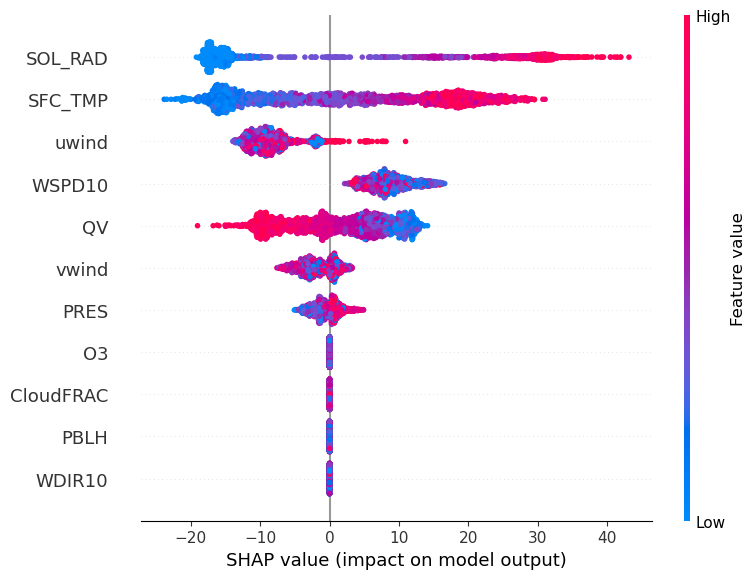

In [42]:
shap.summary_plot(shap_values, features=df_new,)# plot_type="bar")

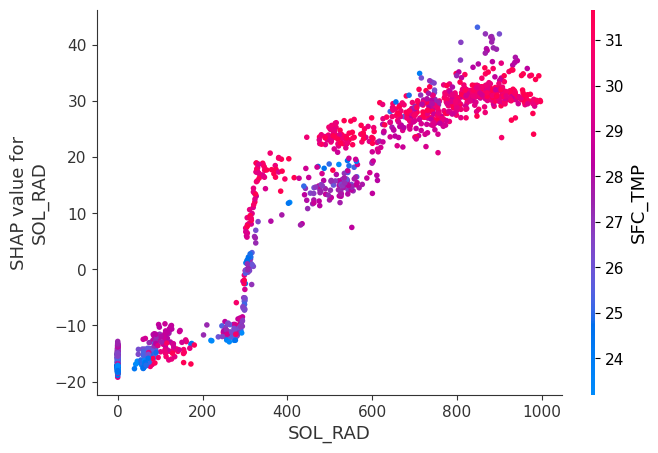

In [22]:
shap.dependence_plot("SOL_RAD", shap_values, df_low)